In [48]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [49]:
#carga el texto
data=loadtxt("munich.txt")

(1994, 2014)

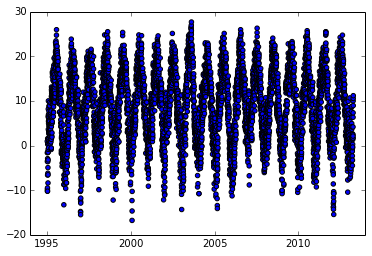

In [60]:
#Filtra el texto y grafica los datos
data1 = where( (data[:,1]>-80) & (data[:,1]<80))[0]
t = data[data1,0]
tp    = data[data1,1]
n=len(tp)
scatter(t,tp)
xlim(1994,2014)

In [51]:
#genero la funncion
def temp(t, a, b, c ):
    return a*cos(2*pi*t+b)+c

In [52]:
#Encuentra la solucion con el metodo de minimos cuadrados
G = zeros((n,3))

for i in range (n):
    G[i] = cos(2*pi*t[i]), -sin(2*pi*t[i]),1

Gt= transpose(G)
A = dot(Gt,G)
b= dot(Gt,tp)
sol = linalg.solve(A,b)
print sol

[-9.63835672  2.49153764  9.04084545]


La funcion ajuste es -9.95518358389 cos(2pi*t( -0.25296470686 ))+ 9.04084545219


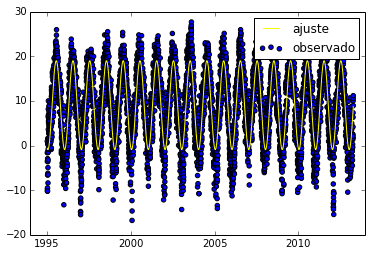

In [53]:
#Constantes que definen la función 
b=arctan(sol[1]/sol[0])
a=sol[0]/cos(b)
c=sol[2]
x=t
y = temp(t,a,b,c)  #si llega a aparecer un error, volver a corre y sevirá, no entiendo por que 
plot(x,y, c='yellow', label = "ajuste")
scatter(t,tp, label="observado")
legend(loc=0)
xlim(1994,2014)
print "La funcion ajuste es",a,"cos(2pi*t(",b,"))+",c

In [54]:
#Encuentra la bondad bajo la formula establecida
bondad=0
for i in range (n):
    bondad=bondad+((tp[i]-temp(t[i],a,b,c))**2)/(n-1)
    
print 'la bondad es',bondad

la bondad es 14.4347329304


In [55]:
#el resto de comentarios son historia, funciona igual pero con otro parametro.
G = zeros((n,4))

for i in range (n):
    G[i] = cos(2*pi*t[i]), -sin(2*pi*t[i]), t[i],1

Gt= transpose(G)
A = dot(Gt,G)
b= dot(Gt,tp)
sol = linalg.solve(A,b)
print sol
print t

[ -9.64459869e+00   2.48774418e+00   3.72207826e-02  -6.55550850e+01]
[ 1995.00274  1995.00548  1995.00821 ...,  2013.27926  2013.282    2013.28474]


In [56]:
#genero la funncion
def tempi(t, a, b, c, e ):
    return a*cos(2*pi*t+b)+c*t+e

La nueva funcion ajuste es -9.96027886678 cos(2pi * t( -0.252439124858 )) + 0.0372207826358 t -65.5550850159


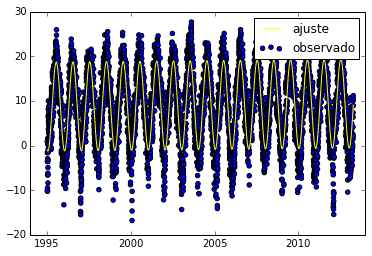

In [57]:
b=arctan(sol[1]/sol[0])
a=sol[0]/cos(b)
c=sol[2]
e=sol[3]
x=t
y = tempi(t,a,b,c,e)  #si llega a aparecer un error, volver a corre y sevirá, no entiendo por que 
plot(x,y, c='yellow', label = "ajuste")
scatter(t,tp, label="observado")
legend(loc=0)
xlim(1994,2014)
print "La nueva funcion ajuste es",a,"cos(2pi * t(",b,")) +",c,"t",e

In [58]:
bondad=0
for i in range (n):
    bondad=bondad+((tp[i]-tempi(t[i],a,b,c,e))**2)/(n-1)
    
print 'la nueva bondad es',bondad

la nueva bondad es 14.3958787096


In [59]:
#Podemos ver que ambas bondades son pésimas, esto nos dice que el modelo suegerido 
#para estudiar el fenómeno es pésimo. Ninguno es más correcto.